# PROJECT: Investigate a Dataset - [No-show appointments]

## Table of Contents¶
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## INTRODUCTION

### Dataset Description

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>**AppointmentDay** tells us on what day the patient set up their next appointment.

>**Age** tells patients age

>**ScheduledDay** tells us on what day the patient set up their appointment.

>**Neighborhood** indicates the location of the hospital.

>**Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>**Hypertension** indiactes patient is ailing with hypertension

>**Diabetes** indiactes patient is ailing with diabetes

>**Alcoholism** indiactes patient has alcoholic problems

>**Handicap** indiactes patient is handicapped

>**SMS_received** indiactes number of reminder text messages sent to patient

>**No show** Encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**1** What is the age distribution of patients that did/didnt show up for their appointmensts?

>**2** Which of the patients with medical conditions registered the most no-show appointments (correlation existing between medical condition and no_show)

>**3** What is the proportion of all the patient's attributes in the datset? 

>**4** What is the relationship between age/gender and the diabetic condition of patients

### importing statements for all the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties

In [2]:
#Importing Data into Machine
df = pd.read_csv('/Users/user/Desktop/UDACITY_PROJECT/noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Investigating for duplicate values
df.duplicated().sum()

0

In [5]:
#Investigating for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

###### DataFrame has no duplicated rows as shown using the .duplicated() function
###### DataFrame has no null values as shown using the .isnull() function

### Data Cleaning

In [6]:
# Renaming a mispelled column Hipertension
df.rename(columns = {'Hipertension' : 'Hypertension'}, inplace = True)

# Renaming a mispelled column No-show
df.rename(columns = {'No-show' : 'No_show'}, inplace = True)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Checking data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_show            object
dtype: object

In [9]:
#Fixing Data Types
#Change PatientID from Float to String
df.PatientId = df.PatientId.astype(str)

#Change AppointmentID from Int to String
df.AppointmentID = df.AppointmentID.astype(str)

#Change ScheduledDay from String to datetime
df.ScheduledDay = df.ScheduledDay.apply(pd.to_datetime)

#Change AppointmentDay from String to datetime
df.AppointmentDay = df.AppointmentDay.apply(pd.to_datetime)


In [10]:
#Confirming changes made to the data types
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Exploratory Data Analysis

In [11]:
#Creating a Age group column 
conditions = [
        (df['Age'] <= 20),
        (df['Age'] > 20) & (df['Age'] <= 40),
        (df['Age'] > 40) & (df['Age'] <= 60),
        (df['Age'] > 60) & (df['Age'] <= 80),
        (df['Age'] > 80) & (df['Age'] <= 100),
        (df['Age'] > 100) & (df['Age'] <= 120)
]

Values = ['<=20 yrs-old','21-40 yrs-old',
          '41-60 yrs-old','61-80 yrs-old', 
          '81-100 yrs-old', '101-120 yrs-old']

df['Age_group'] = np.select(conditions,Values)

In [12]:
#Corfirming the new column
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61-80 yrs-old



### 1. What is the age distribution of total appointments?

In [13]:
# Filtering the dataset to show Age group distribution of total Appointments
Age_group_app = df.groupby('Age_group')['Age'].count().reindex(['<=20 yrs-old','21-40 yrs-old','41-60 yrs-old','61-80 yrs-old', '81-100 yrs-old', '101-120 yrs-old'])
Age_group_app

Age_group
<=20 yrs-old       31849
21-40 yrs-old      28835
41-60 yrs-old      30081
61-80 yrs-old      16910
81-100 yrs-old      2845
101-120 yrs-old        7
Name: Age, dtype: int64

Text(0, 0.5, 'No of appointments')

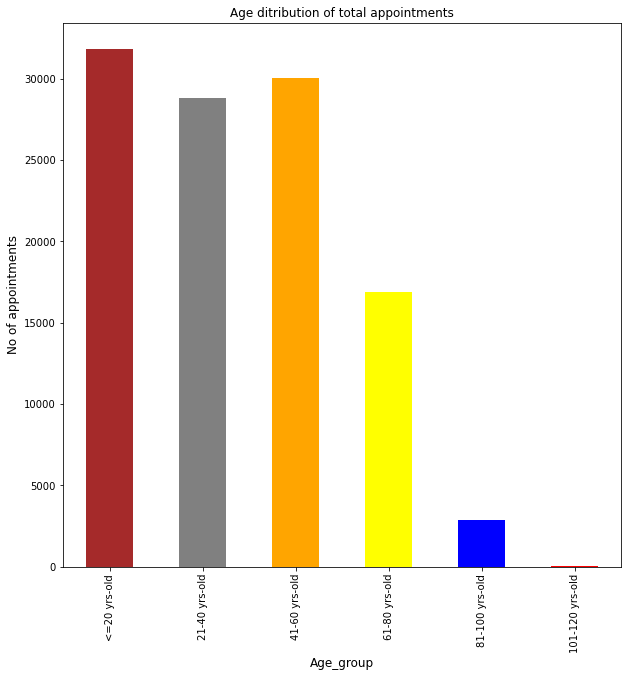

In [14]:
#Plot a bar chat showing the Age group distribution of total appointments
Age_group_app.plot(kind = 'bar', figsize= (10,10),
            title = 'Age ditribution of total appointments', color = ('brown','grey', 'orange','yellow','blue', 'red'));
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('No of appointments', fontsize = 12)

### From the Age range in the statistics shown above, the statistics shows that:
>1. There are more Younger patients visiting the hospital.
>2. Number of appointments decreases with increasing Age group

### 2. What is the age distribution of patients with missed appointments?

In [15]:
# Filtering the dataset to show missed appointments(Yes) by AGE_GROUP
Missed = df.query('No_show == "Yes"')['Age_group'].value_counts()
Missed

<=20 yrs-old       7096
21-40 yrs-old      6626
41-60 yrs-old      5591
61-80 yrs-old      2537
81-100 yrs-old      466
101-120 yrs-old       3
Name: Age_group, dtype: int64

Text(0, 0.5, 'No of Missed appointments')

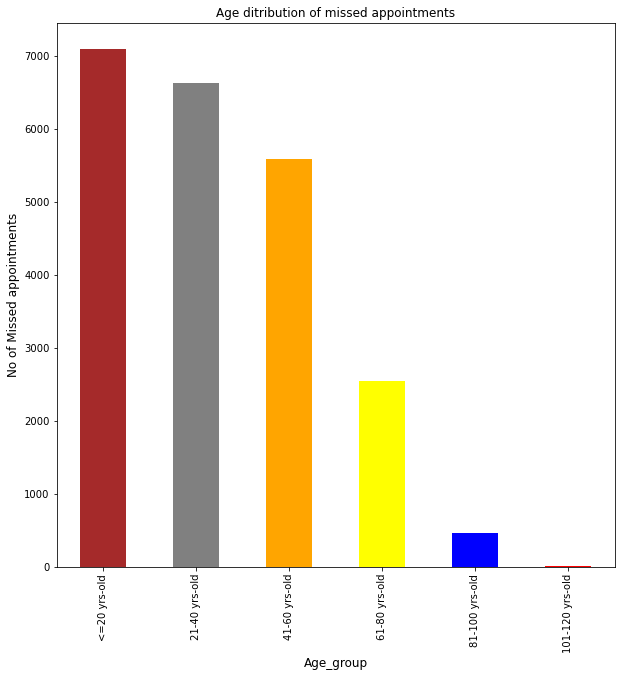

In [16]:
#Plotting a bar chat showing the distribution of Age group relative to missed appointments
Missed.plot(kind = 'bar', figsize= (10,10),
            title = 'Age ditribution of missed appointments', color = ('brown','grey', 'orange','yellow','blue', 'red'));
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('No of Missed appointments', fontsize = 12)

#### From the Age range in the statistics shown above, the statistics shows that:
>1. Younger patients are more likely to miss their appointments than older patients

***NB: Younger patients <20 years old have an higher overall number of appointments***

### 3. What is the age distribution of patients that showed up for their appointments?

In [17]:
# Filtering the dataset to show appointments(No) that showed up by AGE_GROUP
Showed = df.query('No_show == "No"')['Age_group'].value_counts()
Showed

<=20 yrs-old       24753
41-60 yrs-old      24490
21-40 yrs-old      22209
61-80 yrs-old      14373
81-100 yrs-old      2379
101-120 yrs-old        4
Name: Age_group, dtype: int64

Text(0, 0.5, 'No of Showed appointments')

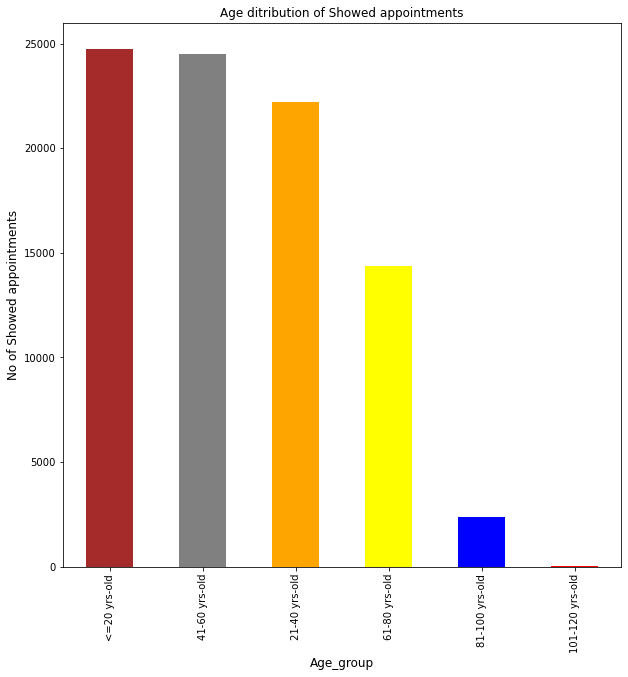

In [18]:
#Plotting a bar chat showing the distribution of Age group relative to missed appointments
Showed.plot(kind = 'bar', figsize= (10,10),
            title = 'Age ditribution of Showed appointments', color = ('brown','grey', 'orange','yellow','blue', 'red'));
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('No of Showed appointments', fontsize = 12)

#### From the Age range in the statistics shown above, the statistics shows that:
>1. <=20 years old patients are more likely to show for their appointments than older patients

***NB: Younger patients <20 years old have an higher overall number of appointments***

In [19]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61-80 yrs-old
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-60 yrs-old
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61-80 yrs-old
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<=20 yrs-old
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-60 yrs-old
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,61-80 yrs-old
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,21-40 yrs-old
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,21-40 yrs-old
8,56394729949972.0,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,21-40 yrs-old
9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,<=20 yrs-old


### 4. WHAT IS THE PROPORTION OF ALL THE ATTRIBUTES AND MEDICAL CONDITIONS IN THE DATASET?

#### GENDER

In [20]:
#PROPORTION OF MISSED APPOINTMENTS BY PATIENT'S GENDERS AS A PIECHART
Missed_gender= df.query('No_show == "Yes"')['Gender'].value_counts()
Missed_gender


F    14594
M     7725
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Proportion of missed appointments by gender')

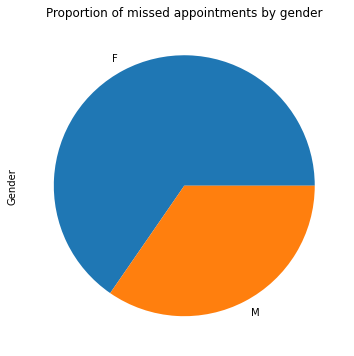

In [21]:
#statistics of missed appointments by patients gender
Missed_gender.plot(kind = 'pie',figsize = (8,6));
plt.title('Proportion of missed appointments by gender')

#### SCHOLARSHIP

In [22]:
#statistics of missed appointments by patients with/without scholarship
Missed_Scholarship = df.query('No_show == "Yes"')['Scholarship'].value_counts()
Missed_Scholarship

0    19741
1     2578
Name: Scholarship, dtype: int64

Text(0, 0.5, 'Count')

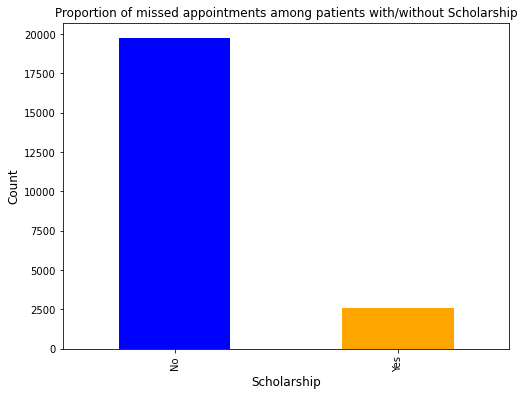

In [23]:
#PROPORTION OF MISSED APPOINTMENTS BY PATIENTS WITH/WITHOUT SCHOLARSHIPS AS A BARPLOT
colors = ('blue','orange')
Missed_Scholarship.plot(kind = 'bar', color = colors, figsize = (8,6));
plt.xticks([0, 1], ['No', 'Yes']);
plt.title('Proportion of missed appointments among patients with/without Scholarship')
plt.xlabel('Scholarship', fontsize = 12 )
plt.ylabel('Count', fontsize = 12)

#### From the statistics and plot of patients with/without Scholarship shown above, the statistics shows that:
> Patients eligible for scholarship in the Brasilian welfare program Bolsa Família are more likely to show up for their scheduled appointments, while non eligible patients are more likely to miss their appointments

#### HYPERTENSION

In [24]:
#statistics of missed appointments among patients with/without Hypertension
Missed_Hypertension = df.query('No_show == "Yes"')['Hypertension'].value_counts()
Missed_Hypertension

0    18547
1     3772
Name: Hypertension, dtype: int64

Text(0, 0.5, 'Count')

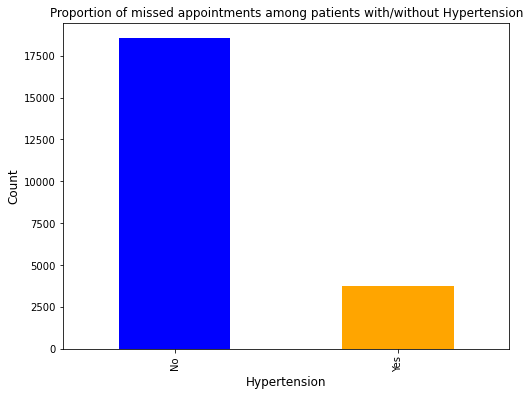

In [25]:
#PROPORTION OF MISSED APPOINTMENTS BY PATIENT WITH/WITHOUT HYPERTENSION AS BAR PLOT
Missed_Hypertension.plot(kind = 'bar', color = colors, figsize = (8,6));
plt.xticks([0, 1], ['No', 'Yes']);
plt.title('Proportion of missed appointments among patients with/without Hypertension')
plt.xlabel('Hypertension', fontsize = 12 )
plt.ylabel('Count', fontsize = 12)

#### From the statistics and plot of patients with/without Hypertension shown above, the statistics shows that:
> Patients ailing with Hypertension are more likely to show up for their scheduled appointments,as opposed to unaffected patients who are more likely to miss their appointments

#### DIABETES

In [26]:
#statistics of missed appointments by patients with/without diabetes
Missed_diabetes = df.query('No_show == "Yes"')['Diabetes'].value_counts()
Missed_diabetes

0    20889
1     1430
Name: Diabetes, dtype: int64

Text(0, 0.5, 'Count')

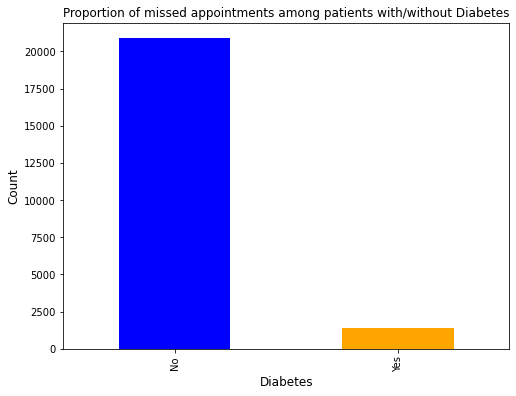

In [27]:
#PROPORTION OF MISSED APPOINTMENTS AMONG PATIENTS WITH DIABETES AS A BARPLOT
Missed_diabetes.plot(kind = 'bar', color = colors, figsize = (8,6));
plt.xticks([0, 1], ['No', 'Yes']);
plt.title('Proportion of missed appointments among patients with/without Diabetes')
plt.xlabel('Diabetes', fontsize = 12 )
plt.ylabel('Count', fontsize = 12)

#### From the statistics and plot of patients with/without Diabetes shown above, the statistics shows that:
>1. Patients ailing with Diabetes are more likely to show up for their scheduled appointments,as opposed to unaffected patients who are more likely to miss their appointments

#### ALCOHOLISM

In [28]:
#statistics of missed appointments among patients with/without Alcoholism
Missed_Alcoholism = df.query('No_show == "Yes"')['Alcoholism'].value_counts()
Missed_Alcoholism

0    21642
1      677
Name: Alcoholism, dtype: int64

Text(0, 0.5, 'Count')

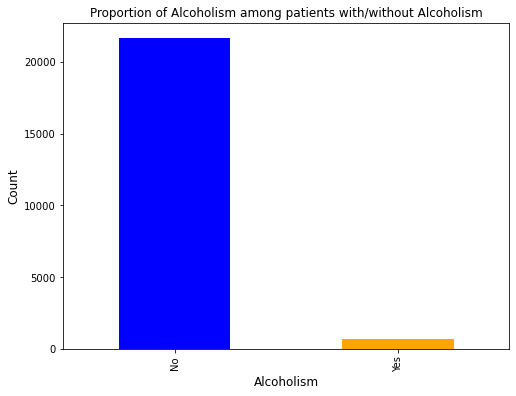

In [29]:
#PROPORTION OF MISSED APPOINTMENTS AMONG PATIENTS WITH ALCOHOLISM AS A BARPLOT
Missed_Alcoholism.plot(kind = 'bar', color = colors, figsize = (8,6));
plt.xticks([0, 1], ['No', 'Yes']);
plt.title('Proportion of Alcoholism among patients with/without Alcoholism')
plt.xlabel('Alcoholism', fontsize = 12 )
plt.ylabel('Count', fontsize = 12)

#### From the statistics and plot of patients with/without Alcoholism shown above, the statistics shows that:
> Patients battling with issues of Alcoholism are more likely to show up for their scheduled appointments,as opposed to unaffected patients who are more likely to miss their appointments

#### HANDCAP

In [30]:
#statistics of missed appointments among handicapped patients
Missed_handcap = df.query('No_show == "Yes"')['Handcap'].value_counts()
Missed_handcap

0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64

Text(0, 0.5, 'Count')

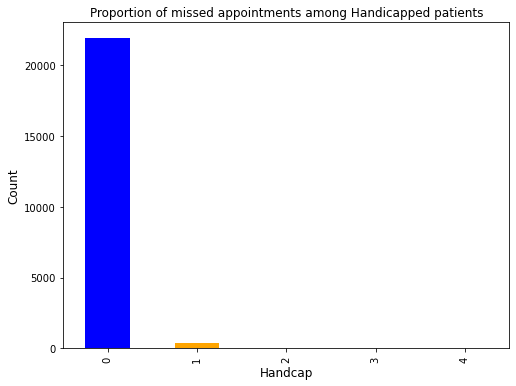

In [31]:
#PROPORTION OF MISSED APPOINTMENTS AMONG HANDICAP PATIENTS AS A BARPLOT
Missed_handcap.plot(kind = 'bar', color = colors, figsize = (8,6));
plt.title('Proportion of missed appointments among Handicapped patients')
plt.xlabel('Handcap', fontsize = 12 )
plt.ylabel('Count', fontsize = 12)

#### From the statistics and plot of Handicapped patients shown above, the statistics shows that:
> Handicapped patients are more likely to show up for their scheduled appointments,as opposed to unaffected patients without any impairments who are more likely to miss their appointments

#### SMS_RECEIVED

In [32]:
#Statistics of appointments missed by patients that received an SMS prior to their appointment
Missed_SMS = df.query('No_show == "Yes"')['SMS_received'].value_counts()
Missed_SMS

0    12535
1     9784
Name: SMS_received, dtype: int64

Text(0, 0.5, 'Count')

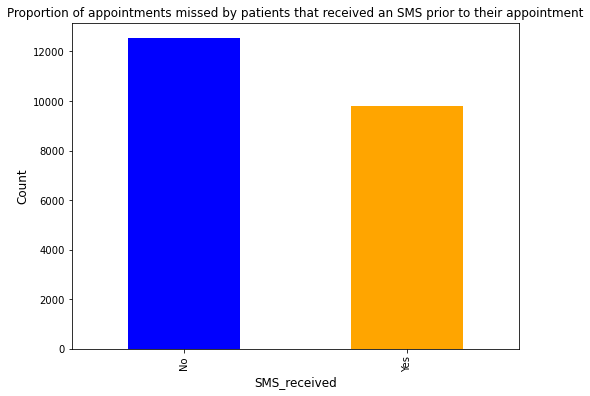

In [33]:
#Proportion of appointments missed by patients that received an SMS prior to their appointment AS A BARPLOT
Missed_SMS.plot(kind = 'bar', color = colors, figsize = (8,6));
plt.xticks([0, 1], ['No', 'Yes']);
plt.title('Proportion of appointments missed by patients that received an SMS prior to their appointment')
plt.xlabel('SMS_received', fontsize = 12 )
plt.ylabel('Count', fontsize = 12)

#### From the statistics and plot of patients with/without Alcoholism shown above, the statistics shows that:
> While patients who weren't prompted about their scheduled appointments through an SMS message are more likely to show up for their scheduled appointments, a substantial number of patients that got an SMS message still missed their appointments with only a ~20 difference in the number of patients that got an SMS and those that didn't.

### 5. WHAT IS THE RELATIONSHIP BETWEEN AGE/GENDER  AND DIABETIC CONDITIONS OF PATIENTS

In [34]:
#Filter the dataset to capture only diabetic patients
Diabetic_patients = df[df['Diabetes'] == 1]
Diabetic_patients

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_group
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-60 yrs-old
36,72984587621439.0,5637975,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,61-80 yrs-old
37,1578131861739.0,5637986,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No,61-80 yrs-old
41,822432466381793.0,5633339,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARUÍPE,0,0,1,0,0,0,No,61-80 yrs-old
44,274164858852.0,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,61-80 yrs-old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110448,262918365834899.0,5756082,F,2016-06-01 07:56:41+00:00,2016-06-06 00:00:00+00:00,40,RESISTÊNCIA,0,1,1,0,0,1,No,21-40 yrs-old
110456,4994741664898.0,5772107,F,2016-06-03 14:34:46+00:00,2016-06-03 00:00:00+00:00,79,RESISTÊNCIA,0,1,1,0,0,0,No,61-80 yrs-old
110468,322747477995.0,5763322,F,2016-06-02 08:49:21+00:00,2016-06-07 00:00:00+00:00,76,RESISTÊNCIA,0,1,1,0,0,1,No,61-80 yrs-old
110477,27984936871939.0,5673472,F,2016-05-09 09:24:09+00:00,2016-06-06 00:00:00+00:00,67,RESISTÊNCIA,0,0,1,0,0,1,No,61-80 yrs-old


In [35]:
#Total count of diabetic patient by gender
Gender_totals = Diabetic_patients.groupby('Gender').count()['Diabetes']
Gender_totals

Gender
F    5606
M    2337
Name: Diabetes, dtype: int64

> There is an overall higher number of female patients with diabetic condition than male patients

In [36]:
#Count of diabetic patient by age group and gender
Age_gender_count = Diabetic_patients.groupby(['Gender','Age_group']).count()['Diabetes']
Age_gender_count

Gender  Age_group     
F       21-40 yrs-old      379
        41-60 yrs-old     2080
        61-80 yrs-old     2676
        81-100 yrs-old     426
        <=20 yrs-old        45
M       21-40 yrs-old      128
        41-60 yrs-old      908
        61-80 yrs-old     1125
        81-100 yrs-old     160
        <=20 yrs-old        16
Name: Diabetes, dtype: int64

In [37]:
#Verifying to confirm that the age_group 101-120yrs old registered no diabetic patient
Diabetic_patients.query('Age_group == "101-120 yrs-old"').value_counts()

Series([], dtype: int64)

In [38]:
#get the count of female diabetic patients in each age group
Female_count = Age_gender_count['F']
Female_count

Age_group
21-40 yrs-old      379
41-60 yrs-old     2080
61-80 yrs-old     2676
81-100 yrs-old     426
<=20 yrs-old        45
Name: Diabetes, dtype: int64

In [39]:
#get the count of male diabetic patients in each age group
Male_count = Age_gender_count['M']
Male_count

Age_group
21-40 yrs-old      128
41-60 yrs-old      908
61-80 yrs-old     1125
81-100 yrs-old     160
<=20 yrs-old        16
Name: Diabetes, dtype: int64

In [40]:
ind = np.arange(len(Female_count))  # the x locations for the groups
width = 0.35       # the width of the bars

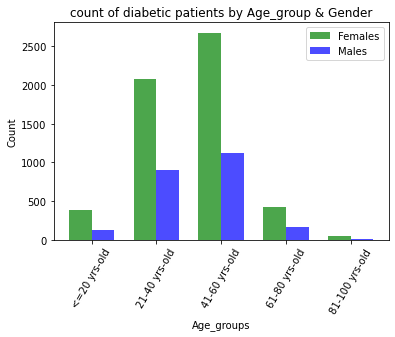

In [41]:
# plot bars
plt.bar(ind, Female_count, width, color='g', alpha=.7, label='Females');
plt.bar(ind + width, Male_count, width, color='b', alpha=.7, label='Males');

# title and labels
plt.ylabel('Count')
plt.xlabel('Age_groups')
plt.title('count of diabetic patients by Age_group & Gender')
locations = ind + width / 2  # xtick locations
labels = ['<=20 yrs-old','21-40 yrs-old','41-60 yrs-old','61-80 yrs-old', '81-100 yrs-old']  # xtick labels
plt.xticks(locations, labels,rotation = 60)

# legend
plt.legend()

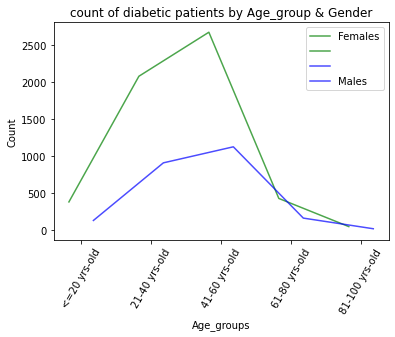

In [48]:
# plot Line Chart
plt.plot(ind, Female_count, width, color='g', alpha=.7, label='Females');
plt.plot(ind + width, Male_count, width, color='b', alpha=.7, label='Males');

# title and labels
plt.ylabel('Count')
plt.xlabel('Age_groups')
plt.title('count of diabetic patients by Age_group & Gender')
locations = ind + width / 2  # xtick locations
labels = ['<=20 yrs-old','21-40 yrs-old','41-60 yrs-old','61-80 yrs-old', '81-100 yrs-old']  # xtick labels
plt.xticks(locations, labels,rotation = 60)

# legend
plt.legend(['Females','','','Males'])

#### From the statistics and plot shown above, the statistics shows that:
>***Throughout all the age groups visiting the hospital, middle aged patients had more count of diabetic conditions than other age groups***

>***There is an overall higher number of female patients suffering from diabetes than male patients throughout all the age groups***

>***Diabetic conditions decreased with age, after 41-60yrs***

### CONCLUSION

>***Younger patients <20 years old have an higher overall number of appointments,there are more Younger patients visiting the hospital than older patients***

>***Number of appointments decreases with increasing Age group***

>***Female patients are more likely to miss their appointments than male patients***

>***Patients eligible for scholarship in the Brasilian welfare program Bolsa Família are more likely to show up for their scheduled appointments***

>***Majority of the patients ailing one disease or medical condition are more likely to show up for their appointments***

>***Patients that got an SMS are more less likely to miss their appointments***

>***Throughout all the age groups visiting the hospital, middle aged patients had more count of diabetic conditions than other age groups***

>***There is an overall higher number of female patients suffering from diabetes than male patients throughout all the age groups***

>***Diabetic conditions decreased with age, after 41-60yrs***